# **Problem Statement**

# Perform EDA on Globalterrorism dataset.

# **Importing Libraries**

In [52]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
import warnings
warnings.filterwarnings('ignore')

# **Load the Dataset**

In [54]:
import chardet
with open("globalterrorismdb_0718dist.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [55]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1',low_memory=False)
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [56]:
df.shape

(181691, 135)

In [57]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Since it contains 135 columns. They have a huge proportion in dataset and Learning them doesn't make any sense. So, we will rename the columns name for better understaning and then we will only extract necessary columns.

In [58]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [59]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [60]:
df.head() 

Year  Month  Day             Country    state                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  
0     Unknown    NaN  
1     Unknown    NaN  
2     Unknown    NaN  
3  Explosives    NaN  
4  Incendiary    NaN

# **Check the missing values**

In [61]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

# **Full summary of the dataset**

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

# **Statistical details of the dataset**

In [63]:
df.describe()

Year          Month            Day       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          longitude         Killed        Wounded  
count  1.771340e+05  171378.000000  165380.000000  
mean  -4.586957e+02       2.403272       3.167668  
std    2.047790e+05      11.545741      35.949392  
min   -8.618590e+07       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000  
50%    4.324651e+01       0.000000       0.000000  
75%    6.871033e+01       2.000000       2.000000  
max    1.793667e+02    1570.000000    8191.000000

# **Function return Series with number of distinct observations over requested axis**

In [64]:
df.nunique()

Year               47
Month              13
Day                32
Country           205
state            2855
Region             12
city            36674
latitude        48322
longitude       48039
AttackType          9
Killed            205
Wounded           238
Target          86006
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
Motive          14490
dtype: int64

# **Find the correlation of dataset**

In [65]:
df.corr()

Year     Month       Day  latitude  longitude    Killed  \
Year       1.000000  0.000139  0.018254  0.166933   0.003917  0.015341   
Month      0.000139  1.000000  0.005497 -0.015978  -0.003880  0.003463   
Day        0.018254  0.005497  1.000000  0.003423  -0.002285 -0.003693   
latitude   0.166933 -0.015978  0.003423  1.000000   0.001463 -0.018124   
longitude  0.003917 -0.003880 -0.002285  0.001463   1.000000 -0.000562   
Killed     0.015341  0.003463 -0.003693 -0.018124  -0.000562  1.000000   
Wounded    0.015273  0.002938 -0.001268  0.015988   0.000223  0.534375   

            Wounded  
Year       0.015273  
Month      0.002938  
Day       -0.001268  
latitude   0.015988  
longitude  0.000223  
Killed     0.534375  
Wounded    1.000000

# **Find the covariance of dataset**

In [66]:
df.cov()

Year        Month          Day     latitude     longitude  \
Year         175.812496     0.006242     2.133346    40.951530  1.059590e+04   
Month          0.006242    11.480600     0.164158    -1.005279 -2.692110e+03   
Day            2.133346     0.164158    77.687385     0.559877 -4.120870e+03   
latitude      40.951530    -1.005279     0.559877   344.816764  5.564253e+03   
longitude  10595.897714 -2692.109846 -4120.870170  5564.252921  4.193443e+10   
Killed         2.292652     0.135442    -0.375477    -3.822593 -1.358855e+03   
Wounded        7.019333     0.357870    -0.401569    10.634340  1.740424e+03   

                Killed      Wounded  
Year          2.292652     7.019333  
Month         0.135442     0.357870  
Day          -0.375477    -0.401569  
latitude     -3.822593    10.634340  
longitude -1358.855169  1740.424297  
Killed      133.304125   188.711482  
Wounded     188.711482  1292.358771

# **HEATMAP OF DATASET**

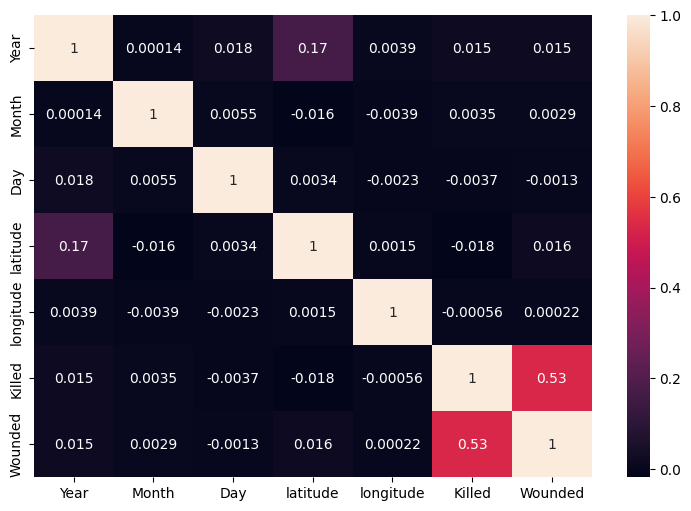

In [67]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df.corr(), annot= True)
plt.show()

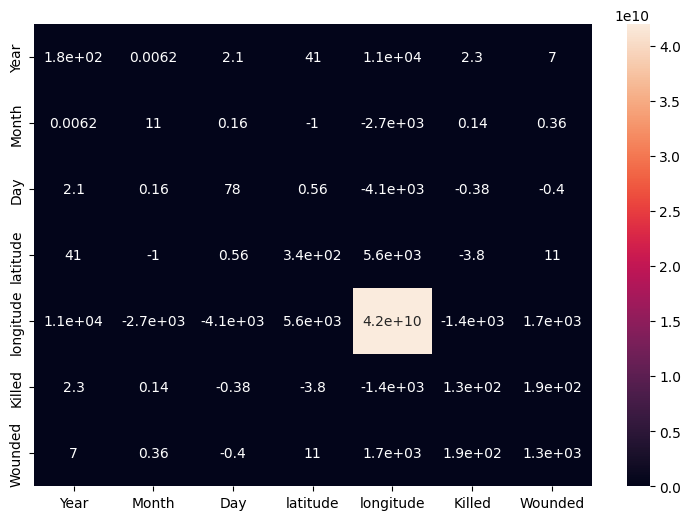

In [68]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df.cov(), annot= True)
plt.show()

# **EDA**

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'Killed'}>],
       [<Axes: title={'center': 'Wounded'}>, <Axes: >, <Axes: >]],
      dtype=object)

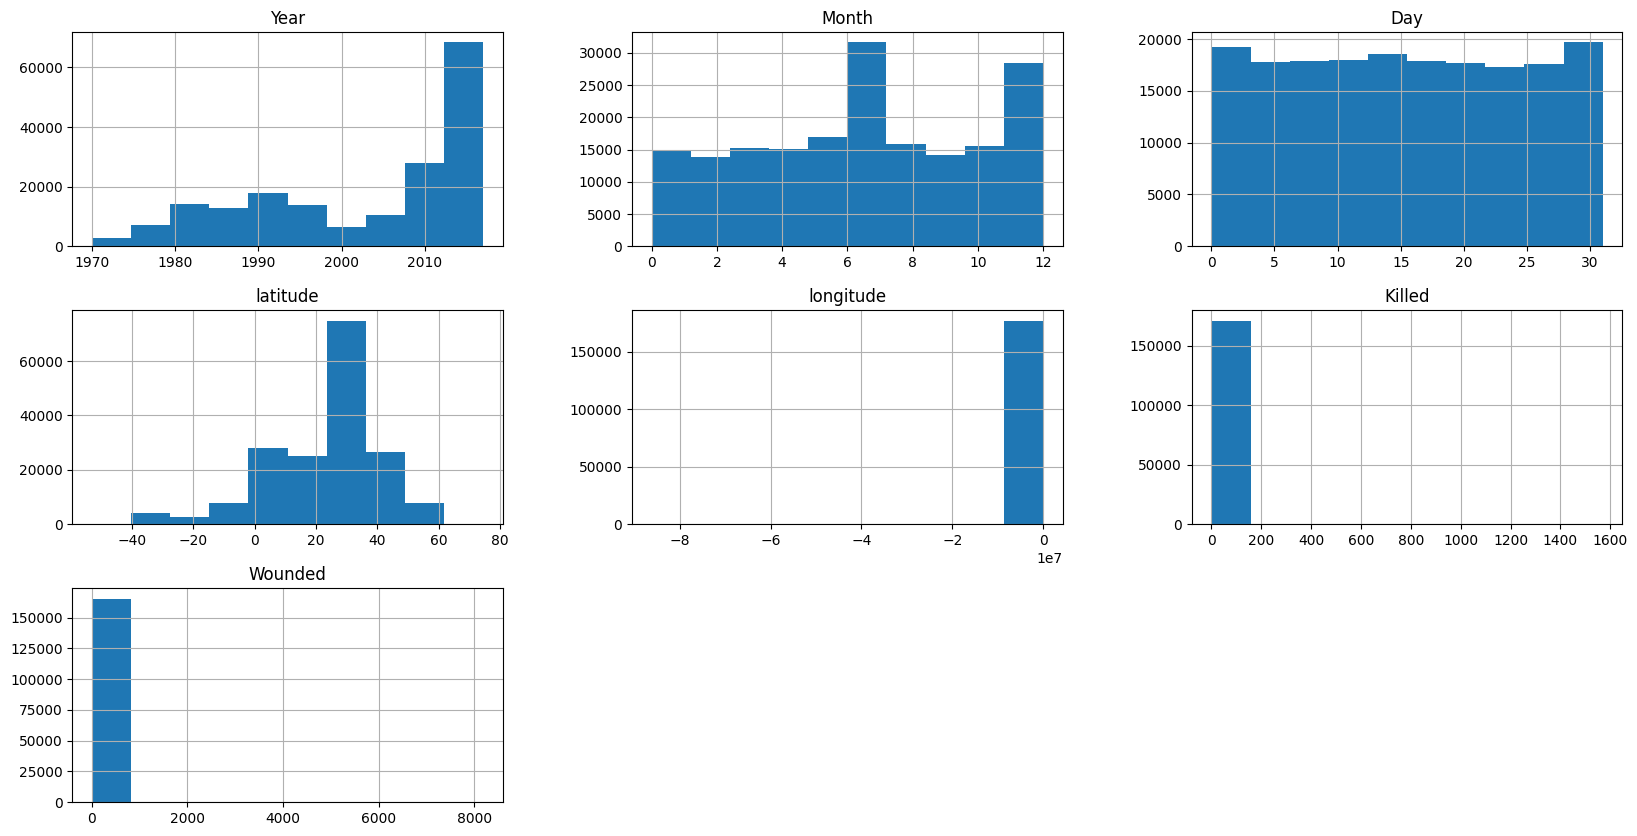

In [69]:
df.hist(figsize=(20,10))  

# **Terrorist Activities by Region in each Year through Area Plot**

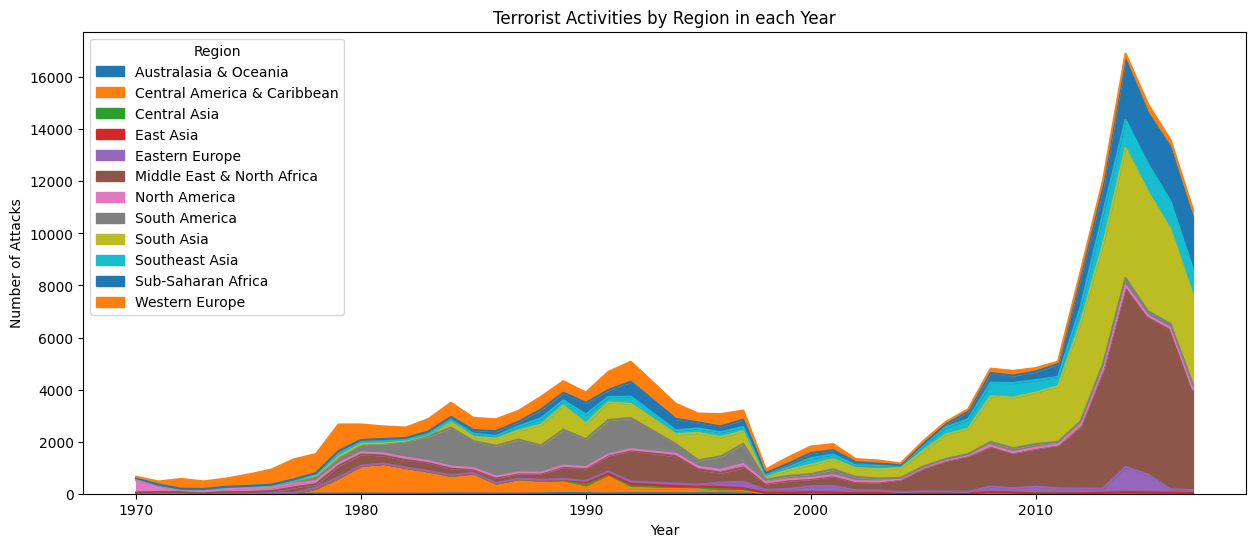

In [70]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

# **Number of Terrorist Activities each Year**

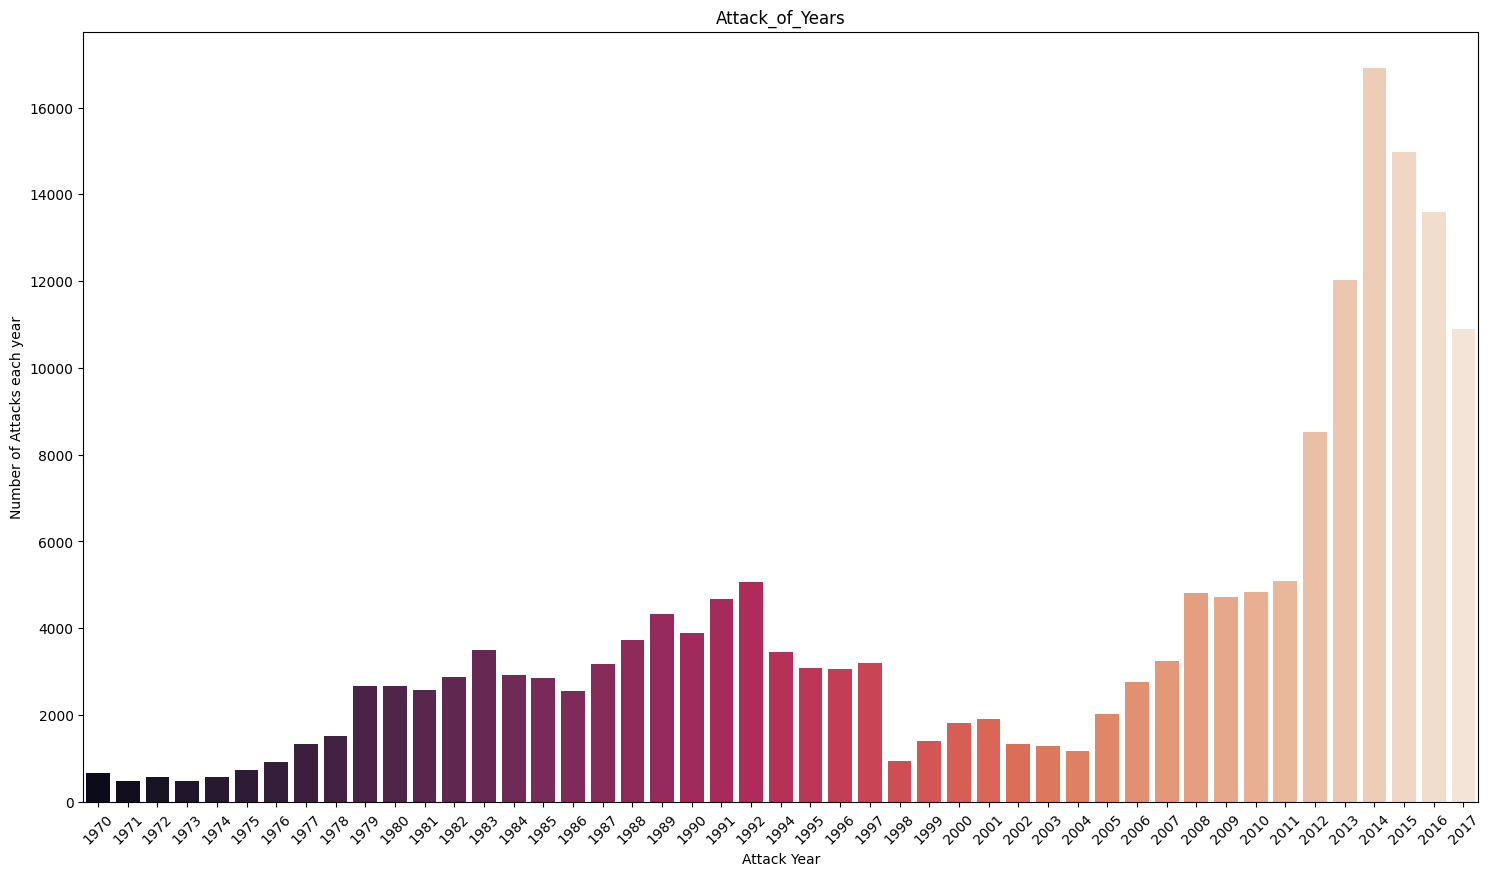

In [71]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

# Since 2014 and 2015 has a large number of Terrorist activities.

# **Number of attack were there in 1970 & 2017 and Also the percentage the attacks have increased.**

In [72]:
Year=df.Year.value_counts().to_dict()
rate=((Year[2017]-Year[1970])/Year[2017])*100
print(Year[1970],'attacks happened in 1970 &',Year[2017],'attacks happened in 2017')
print('So the number of attacks from 1970 has increased by',np.round(rate,0),'% till 2017')

651 attacks happened in 1970 & 10900 attacks happened in 2017
So the number of attacks from 1970 has increased by 94.0 % till 2017


# **The number of casualities corresponding to the killed people in each country for each year.**

In [73]:
import plotly.express as px
px.scatter(df,df.Wounded,df.Killed,hover_name='Country',animation_frame='Year',animation_group='Country',color='AttackType',
           range_color=[0,1],labels={'Killed':'Deaths','Wounded':'Casualities'},
           title='Number of casualities vs Killed people in each country for each year')


# **Total number of terrorist attack in each country and regions using barplot**

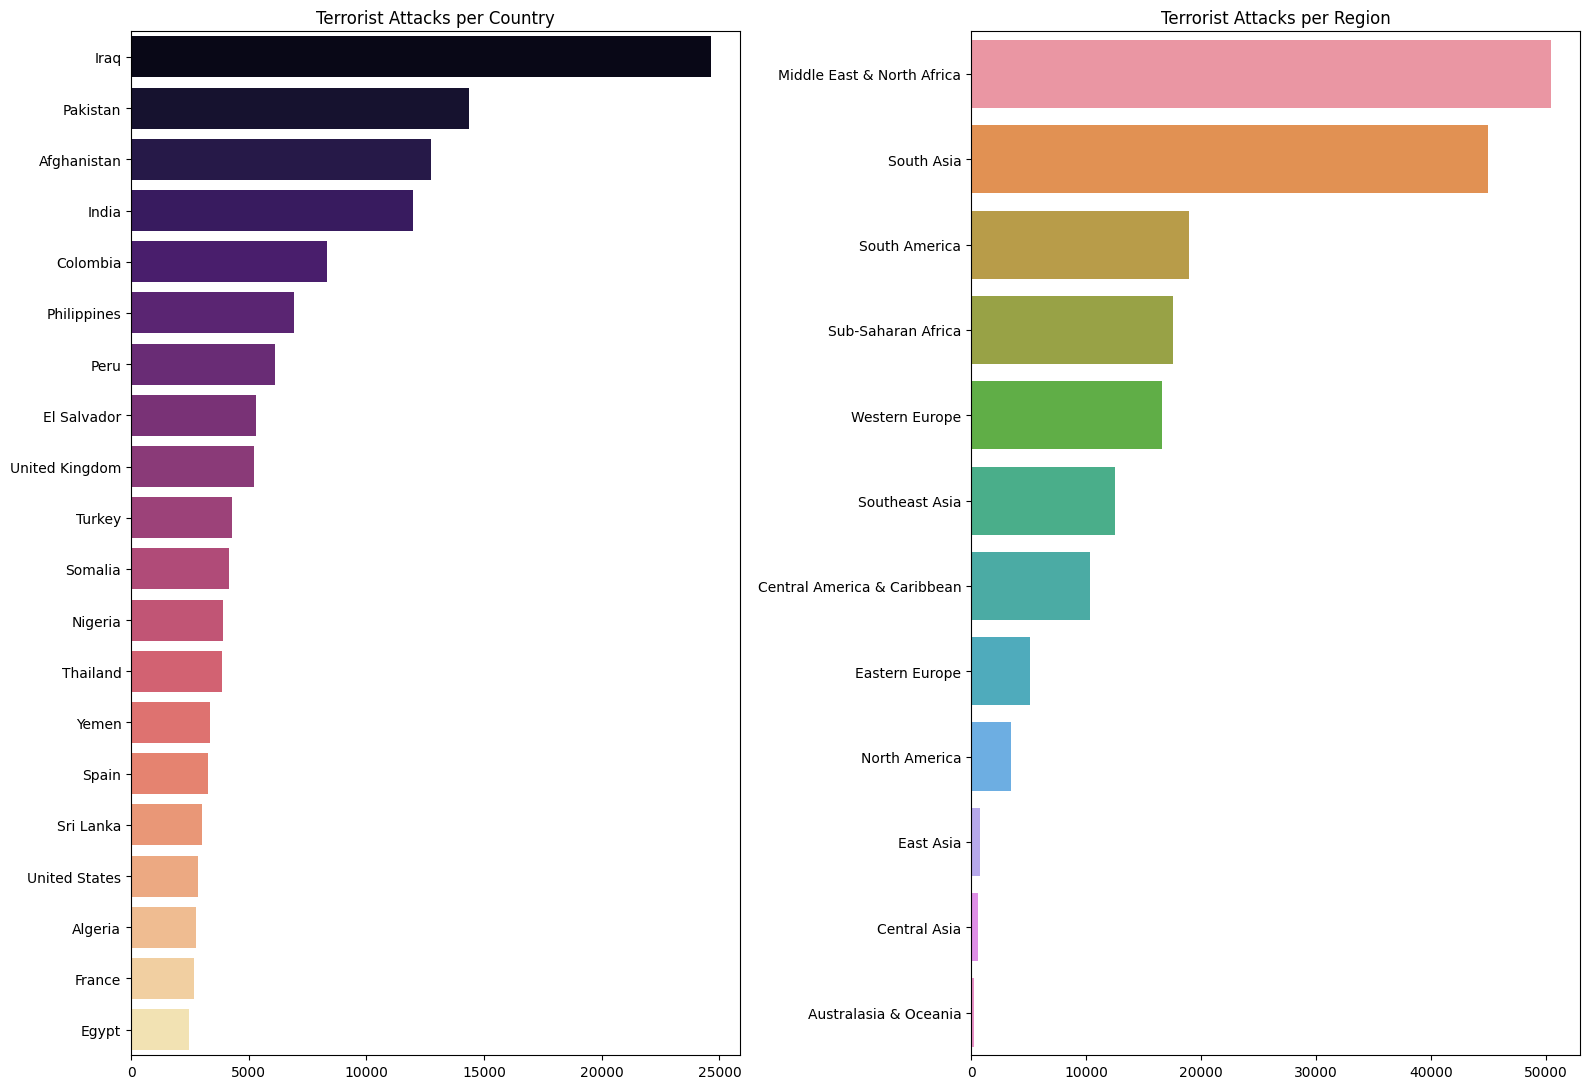

In [79]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = df['Country'].value_counts()[:20].values, y = df['Country'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=df['Region'].value_counts().values,y=df['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

# **The total number of attacks in each country using Globe**

# We will first create a new dataframe which contains the total count of attacks for each country in order to use it as a colour bar.

In [80]:
terr=df.groupby(['Country'],as_index=False).count()

In [81]:
fig=px.choropleth(terr,locations='Country',locationmode='country names',
                  color='Year',hover_name='Country',projection='orthographic',
                  title='Total number of attacks (1970-2017)',labels={'Year':'Attacks'})
fig.show()

# **Country suffered the maximum attacks(state the number) and country suffered minimum attacks(state the number)**

In [82]:
max_count=terr['Year'].max()
max_id=terr['Year'].idxmax()
max_name=terr['Country'][max_id]
min_count=terr['Year'].min()
min_id=terr['Year'].idxmin()
min_name=terr['Country'][min_id]

In [83]:
print(max_name,'has suffered the maximum number of terror attacks of',max_count)
print(min_name,'has suffered the minimum number of terror attacks of',min_count)

Iraq has suffered the maximum number of terror attacks of 24636
Andorra has suffered the minimum number of terror attacks of 1


# **Now let us check out which terrorist organizations have carried out their operations in each country.**

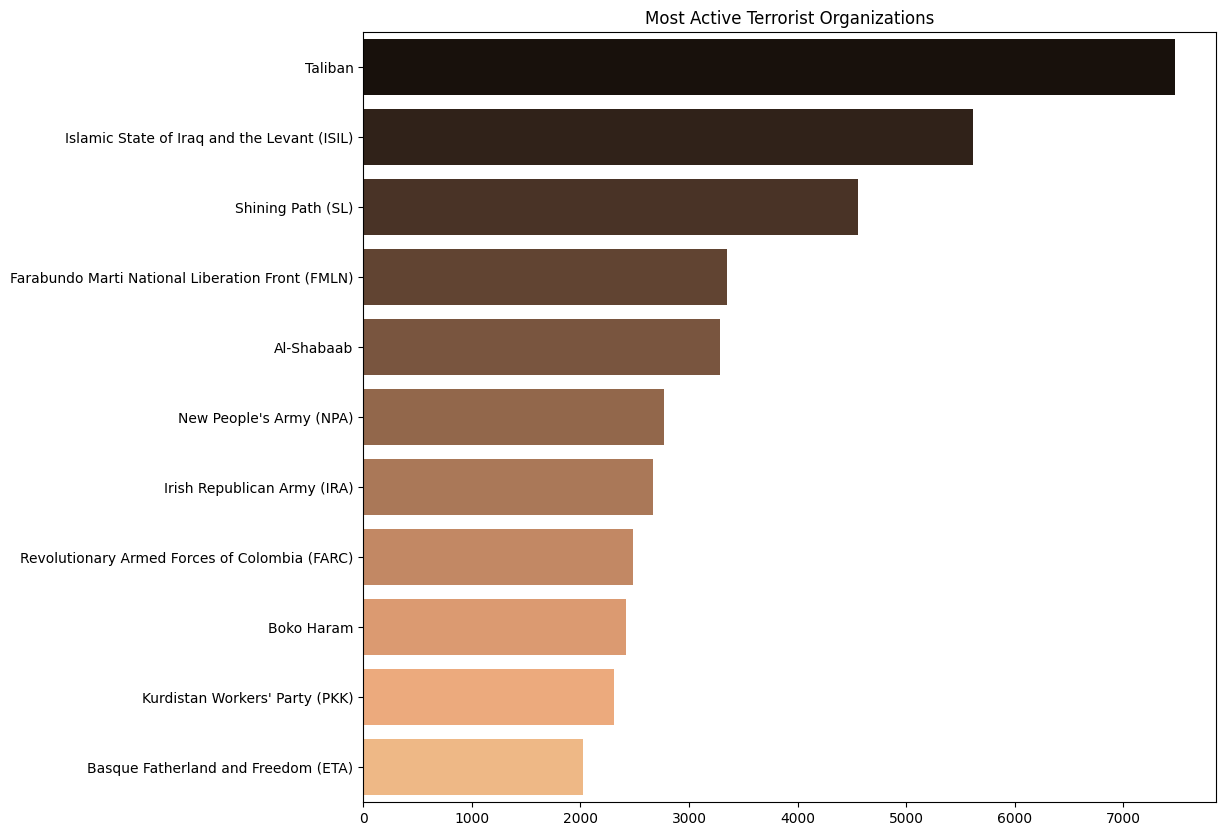

In [84]:
plt.subplots(figsize=(11,10))
sns.barplot(y=df['Group'].value_counts()[1:12].index,x=df['Group'].value_counts()[1:12].values,
           palette='copper')
plt.title('Most Active Terrorist Organizations')
plt.show()

# **Now we will look closer at trend Before and after the War on Terror**

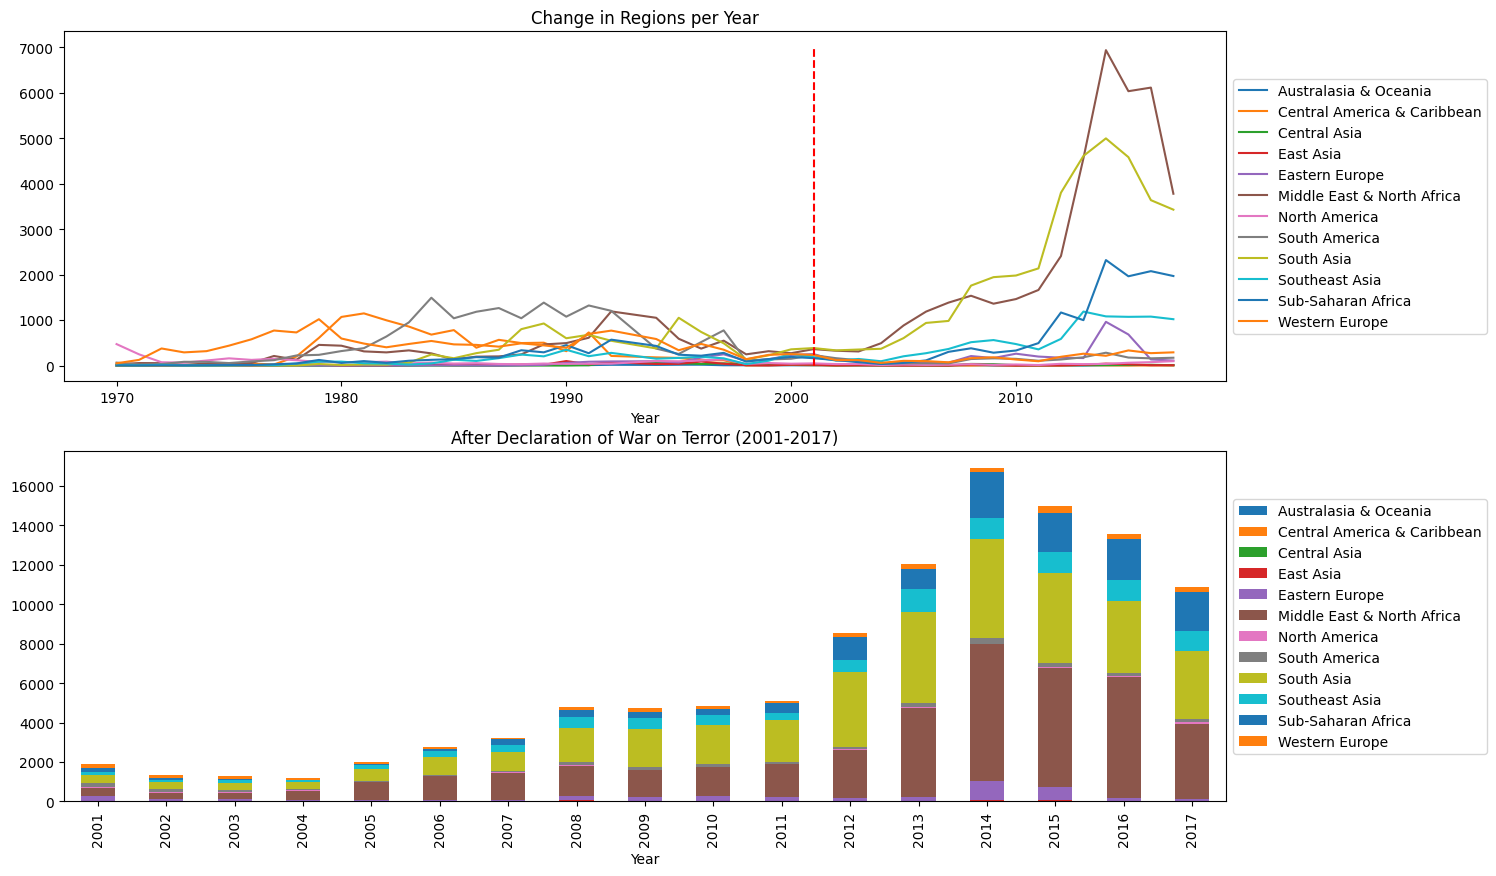

In [85]:
data_after = df[df['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(df.Year,df.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(data_after.Year,data_after.Region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()

From the first plot, it is very noticeable that the terrorism landscape before and after the War on Terror is vastly different. Before 2001, the regions were much closer together in terms of activity, eventually all dropping to a minimum in 2000. After 2001, the Middle East and South Asia have dictated the rise in terrorism numbers, with a significant increase in Sub-Saharan Africa as well

# **Insights derived from the above EDA:**

1.Attacks has increased but number of people killed manier times as attack happened.

2.Iraq has the most attacks.

3.The Middle East and North Africa Regions has most taregeted.

4.Maximum number of attacks are from Bombing/Explosions.

5.There are maximum number of attacks in Private citizens and Property.

6.Taliban and ISIL has a most active organisation.